In this dataset, we are trying to analyze the used car’s price and how data preparation is done (**data preprocessing+ feature engineering+ EDA**)to identify the factors influencing the car price.

# New section

#Import Useful Libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Load Data From CSV File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/CMP7005'

/content/drive/My Drive/CMP7005


In [ ]:
%ls

week4:Workshop/


### **Reading Dataset**

In [ ]:
df = pd.read_csv("used_cars_data.csv")
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


### **Analyzing the Data**
Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

In [ ]:
df.shape

NameError: name 'df' is not defined

the dataset has 7253 rows and 14 columns

In [ ]:
df.head() # head() will display the top 5 observations of the dataset

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.tail() # tail() will display the last 5 observations of the dataset

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
# Function to split numeric values and units
def split_value_and_unit(column):
    value = df[column].str.extract(r'(\d+\.?\d*)').astype(float)
    unit = df[column].str.extract(r'([a-zA-Z/]+)$')
    return value , unit

# Apply the function to the relevant columns
df['Mileage_Value'], df['Mileage_Unit'] = split_value_and_unit('Mileage')
df['Engine_Value'], df['Engine_Unit'] = split_value_and_unit('Engine')
df['Power_Value'], df['Power_Unit'] = split_value_and_unit('Power')
df['New_Price_Value'], df['New_Price_Unit'] = split_value_and_unit('New_Price')

# Display the modified DataFrame
df=df[['S.No.','Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage_Value', 'Engine_Value', 'Power_Value', 'Seats',
       'New_Price_Value', 'Price']]

In [ ]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Value,Engine_Value,Power_Value,Seats,New_Price_Value,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


In [ ]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage_Value', 'Engine_Value',
       'Power_Value', 'Seats', 'New_Price_Value', 'Price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage_Value      7251 non-null   float64
 9   Engine_Value       7207 non-null   float64
 10  Power_Value        7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price_Value    1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Inference:** data.info() shows the variables Mileage, Engine, Power, Seats, New_Price, and Price have missing values. Numeric variables like Mileage, Power are of datatype as  float64 and int64. Categorical variables like Location, Fuel_Type, Transmission, and Owner Type are of object data type

### **Check for Duplication**
nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [ ]:
df.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage_Value,438
Engine_Value,150


### **Missing Values Calculation**
isnull() is widely been in all pre-processing steps to identify null values in the data.
In our example, data.isnull().sum() is used to get the number of missing records in each column

In [ ]:
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage_Value,2
Engine_Value,46


The below code helps to calculate the percentage of missing values in each column

In [ ]:
(df.isnull().sum()/(len(df)))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage_Value,0.027575
Engine_Value,0.634220


The percentage of missing values for the columns New_Price and Price is ~86% and ~17%, respectively.

### **Data Reduction**
Some columns or variables can be dropped if they do not add value to our analysis.
In our dataset, the column S.No have only ID values, assuming they don’t have any predictive power to predict the dependent variable.

In [ ]:
# Remove S.No. column from data
df = df.drop(['S.No.'], axis = 1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Value,Engine_Value,Power_Value,Seats,New_Price_Value,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


### **Feature Engineering**
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

### **Creating Features**
We will play around with the variables Year and Name in our dataset. If we see the sample data, the column “Year” shows the manufacturing year of the car.
It would be difficult to find the car’s age if it is in year format as the Age of the car is a contributing factor to Car Price. Introducing a new column, “**car_age**” to know the age of the car

In [ ]:
from datetime import date
a=date.today().year
print(a)
df['Car_Age']=a-df['Year']
df.head()


2024


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Value,Engine_Value,Power_Value,Seats,New_Price_Value,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,11


Since car names will not be great predictors of the price in our current data. But we can process this column to extract important information using brand and Model names. Let’s split the name and introduce new variables “Brand” and “Model”

In [ ]:
a= df.Name.str.split()
print(a)
df['Brand'] = a.str.get(0)
df['Model'] = a.str.get(1).fillna('') + a.str.get(2).fillna('')
df[['Name', 'Brand', 'Model']]

0                            [Maruti, Wagon, R, LXI, CNG]
1                 [Hyundai, Creta, 1.6, CRDi, SX, Option]
2                                        [Honda, Jazz, V]
3                                   [Maruti, Ertiga, VDI]
4                  [Audi, A4, New, 2.0, TDI, Multitronic]
                              ...                        
7248               [Volkswagen, Vento, Diesel, Trendline]
7249                          [Volkswagen, Polo, GT, TSI]
7250                          [Nissan, Micra, Diesel, XV]
7251                          [Volkswagen, Polo, GT, TSI]
7252    [Mercedes-Benz, E-Class, 2009-2013, E, 220, CD...
Name: Name, Length: 7253, dtype: object


,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


### **Data Cleaning/Wrangling**
Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data.

In the example, The brand name ‘Isuzu’ ‘ISUZU’ and ‘Mini’ and ‘Land’ looks incorrect. This needs to be corrected

In [ ]:
print(df.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [ ]:
print(df.Brand.nunique())

33


In [ ]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
df[df.Brand.str.contains('|'.join(searchfor))].head(5)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Value,Engine_Value,Power_Value,Seats,New_Price_Value,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,44.28,35.67,7,Mini,CooperConvertible


**Explanation of the code:**

'|'.join(searchfor): This combines all the strings in the searchfor list into a single string separated by the | character (which is a special character in regular expressions that means "or").

-The result is a string that looks like 'Isuzu|ISUZU|Mini|Land'.

.str.contains(): This method checks if each element in the Brand column contains any of the terms in the combined string 'Isuzu|ISUZU|Mini|Land'.

It effectively searches for rows where the Brand is either "Isuzu", "ISUZU", "Mini", or contains "Land" (as part of another name like "Land Rover").

In [ ]:
df["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

### ***We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process***

## **EDA-Exploratory Data Analysis**
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.
EDA helps to find meaningful patterns in data.
EDA provides in-depth insights into the data sets to solve our business problems.
EDA gives a clue to impute missing values in the dataset

**describe()–** Provide a statistics summary of data belonging to numerical datatype such as int, float

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.00,6500000.00
Mileage_Value,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.10,33.54
Engine_Value,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.00,5998.00
Power_Value,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.00,10.00
New_Price_Value,1006.0,19.894324,19.813947,1.00,7.635,11.27,23.64,99.92
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.95,160.00
Car_Age,7253.0,10.634634,3.254421,5.00,8.000,10.00,13.00,28.00


From the statistics summary, we can infer the below findings :

*   Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.

*   On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.

*  Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.

* Engine and Power have outliers, and the data is right-skewed.

* The average number of seats in a car is 5. car seat is an important feature in price contribution.

* The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.

**Separating the categorical column and the numerical column**

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage_Value', 'Engine_Value', 'Power_Value', 'Seats', 'New_Price_Value', 'Price', 'Car_Age']


### **EDA Univariate Analysis**

Year
Skew : -0.84


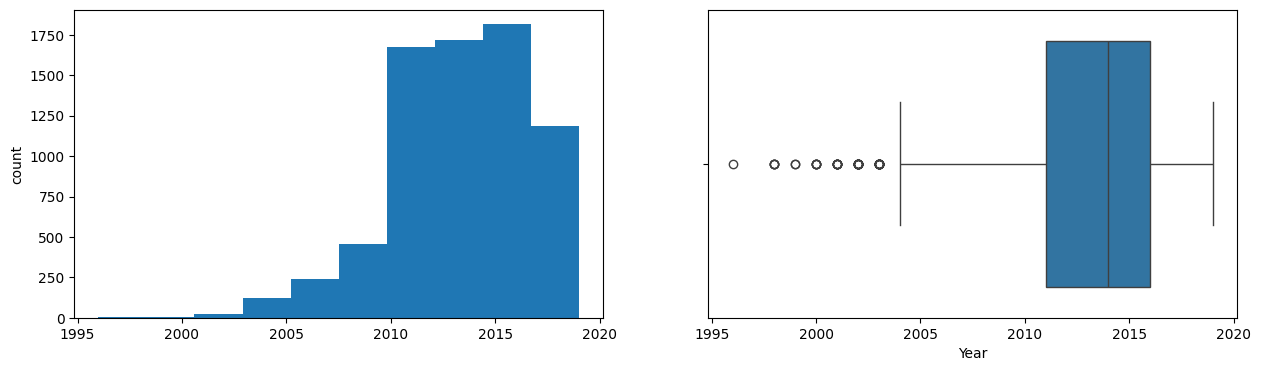

Kilometers_Driven
Skew : 61.58


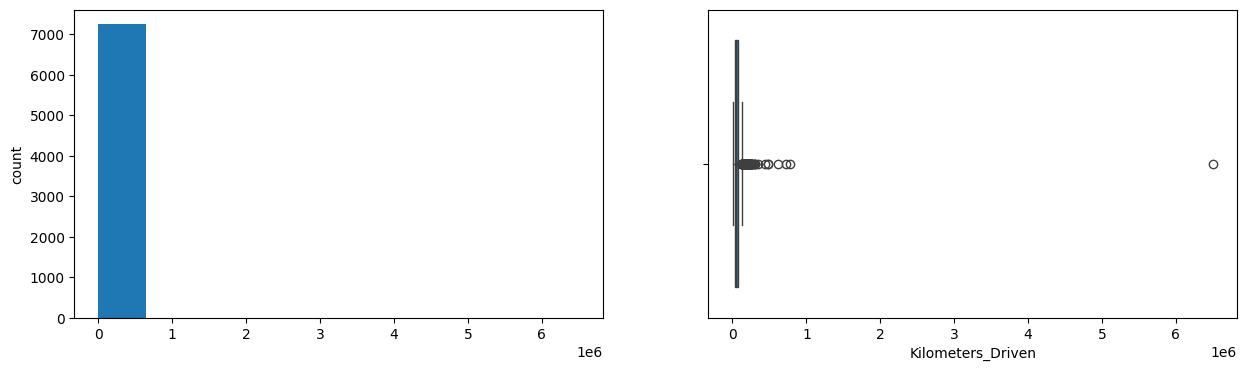

Mileage_Value
Skew : -0.44


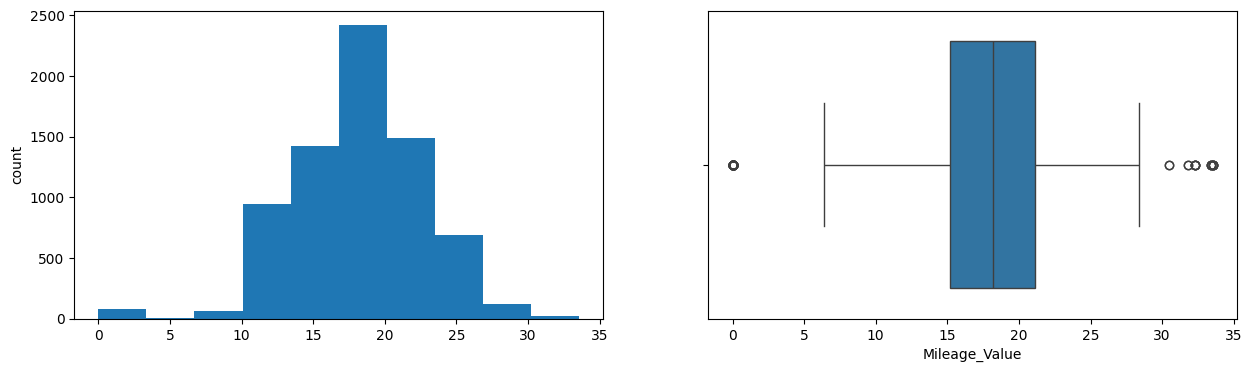

Engine_Value
Skew : 1.41


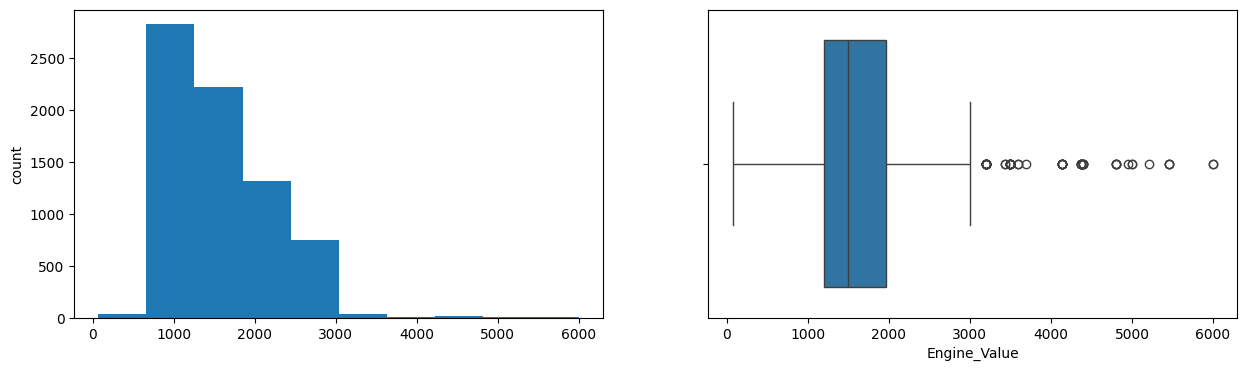

Power_Value
Skew : 1.96


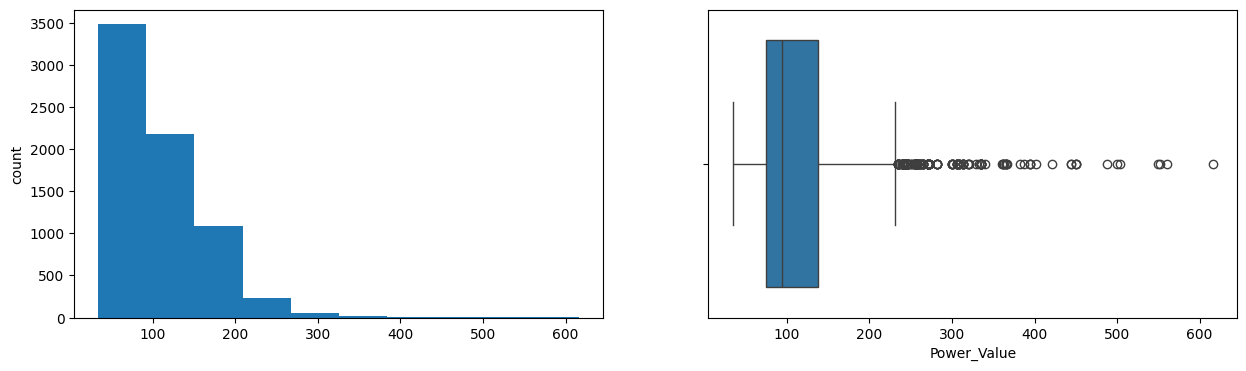

Seats
Skew : 1.9


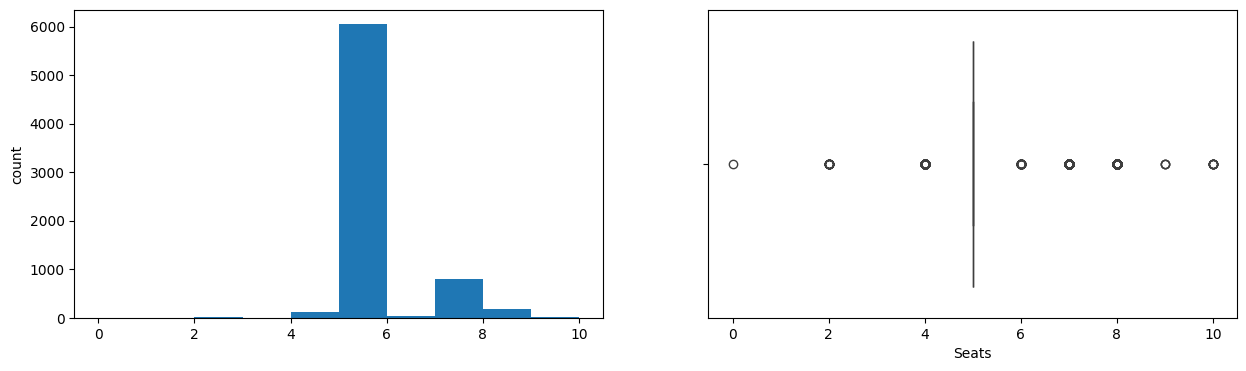

New_Price_Value
Skew : 1.84


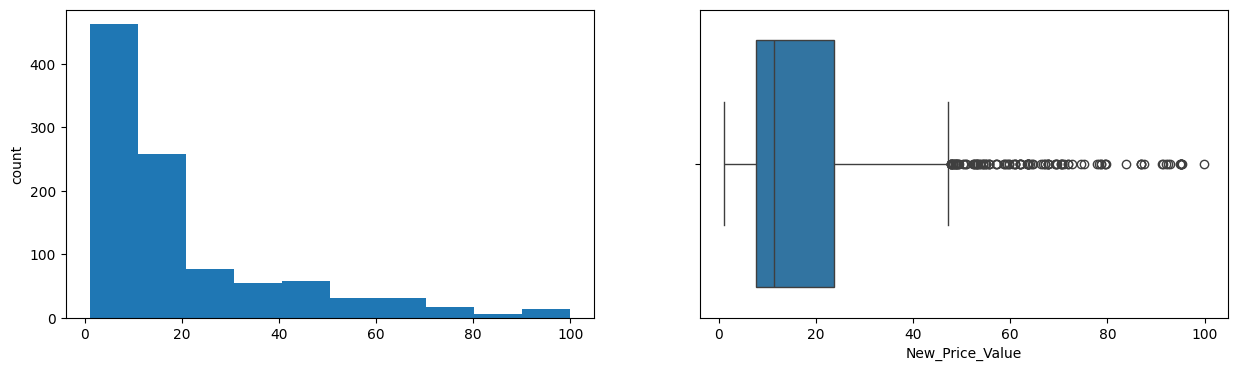

Price
Skew : 3.34


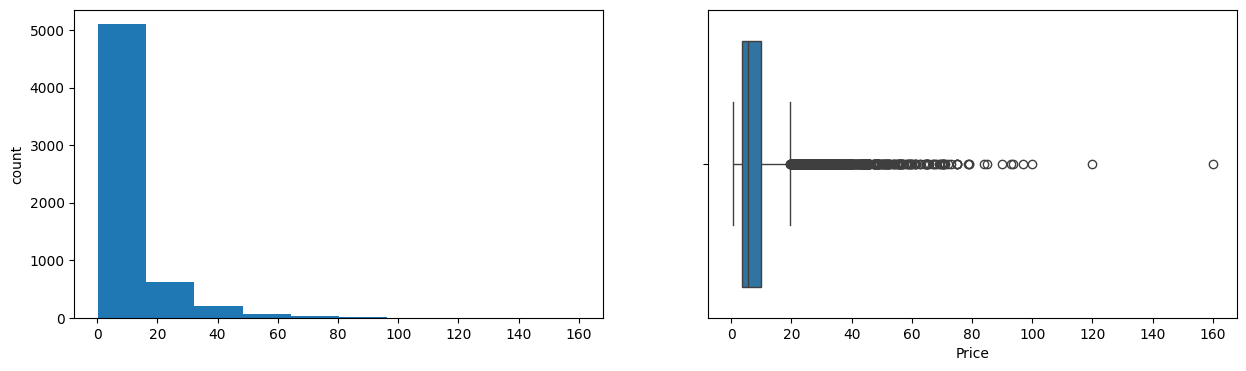

Car_Age
Skew : 0.84


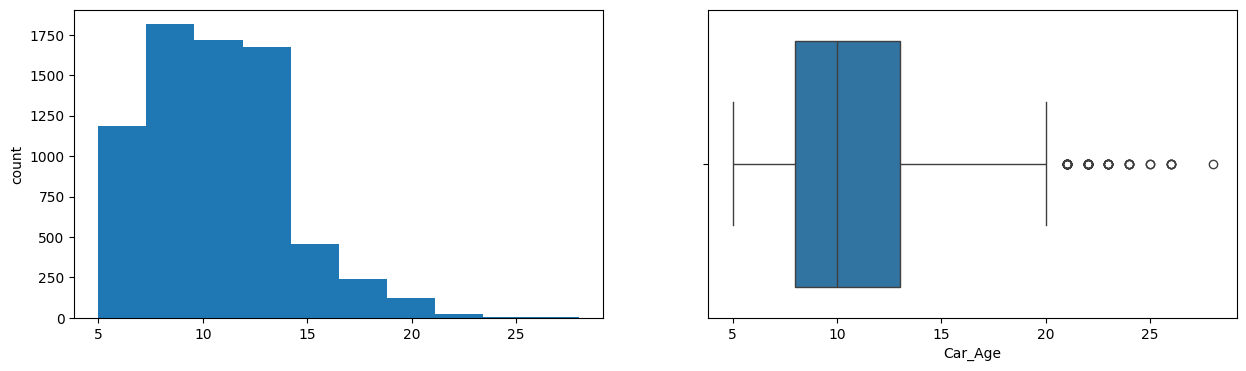

In [ ]:
import seaborn as sns
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
import pandas as pd

# Fill missing values in 'Mileage_Value' with the median
df['Mileage_Value'].fillna(df['Mileage_Value'].median(), inplace=True)

# Fill missing values in 'Engine_Value' with the median
df['Engine_Value'].fillna(df['Engine_Value'].median(), inplace=True)

# Fill missing values in 'Power_Value' with the median
df['Power_Value'].fillna(df['Power_Value'].median(), inplace=True)

# Fill missing values in 'Seats' with the mode (most common value)
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True)

# Fill missing values in 'New_Price_Value' with the median
df['New_Price_Value'].fillna(df['New_Price_Value'].median(), inplace=True)

# Fill missing values in 'Price' with the median
df['Price_log'].fillna(df['Price_log'].mean(), inplace=True)

# Verify that all missing values have been filled
print(df.isnull().sum())


Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage_Value            0
Engine_Value             0
Power_Value              0
Seats                    0
New_Price_Value          0
Price                    0
Car_Age                  0
Brand                    0
Model                    0
Kilometers_Driven_log    0
Price_log                0
dtype: int64


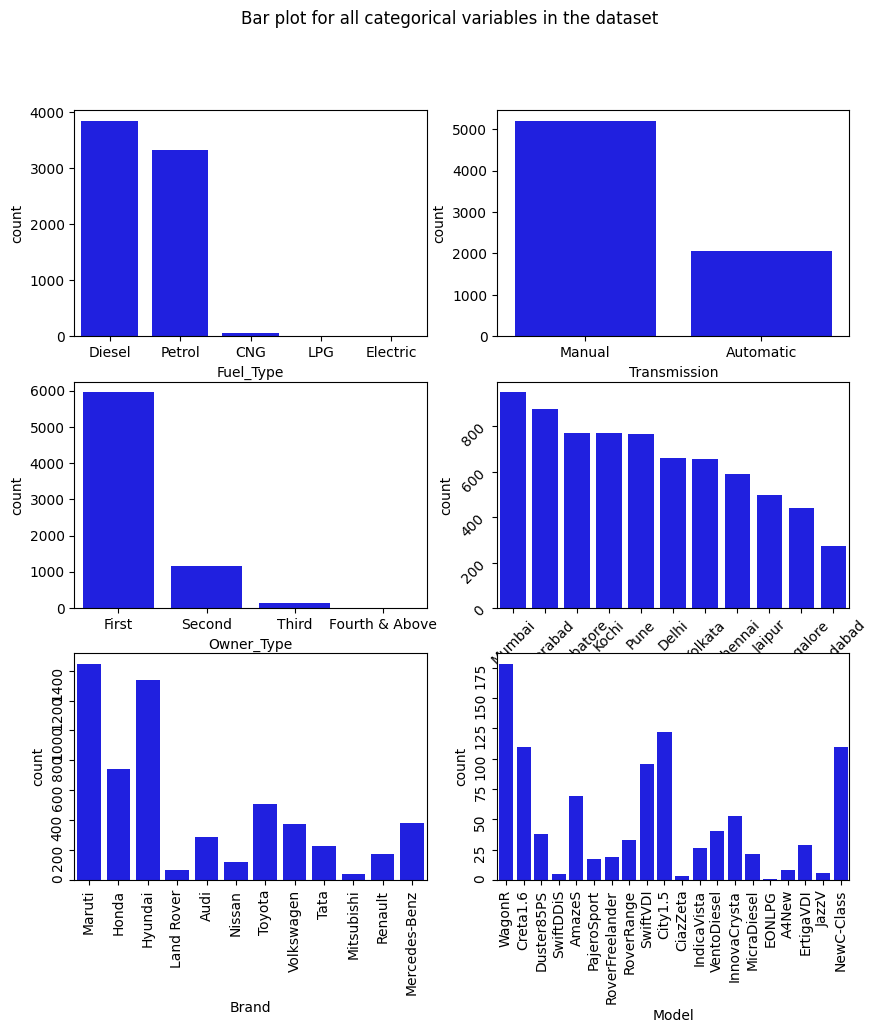

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = df, color = 'blue',
              order = df['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = df, color = 'blue',
              order = df['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = df, color = 'blue',
              order = df['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = df, color = 'blue',
              order = df['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = df, color = 'blue',
              order = df['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = df, color = 'blue',
              order = df['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

# order determines the order in which the categorical values should appear on the x-axis

# df['Fuel_Type'].value_counts().index provides a list of fuel types sorted by their frequency in descending order.
#This means the fuel type with the highest count will be plotted first (on the left), followed by the next most frequent, and so on.



From the count plot, we can have below observations
*  Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
* Majority of cars have fuel type as Diesel this shows diesel cars provide higher performance
*   Majority of cars have manual transmission
*   Majority of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
*  Majority of the cars belong to the brand Maruti followed by Hyundai
* WagonR ranks first among all models which are available for purchase











<Axes: xlabel='Price', ylabel='Density'>

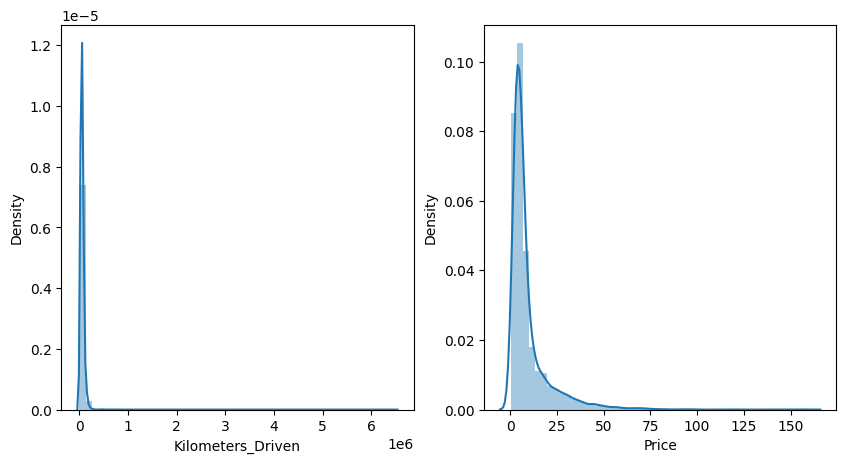

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.distplot(df["Kilometers_Driven"], axlabel="Kilometers_Driven",ax=axes[0])
sns.distplot(df["Price"], axlabel="Price",ax=axes[1])

In [ ]:
df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven'])
df['Price_log'] = np.log(df['Price'])

<Axes: xlabel='Price_log', ylabel='Density'>

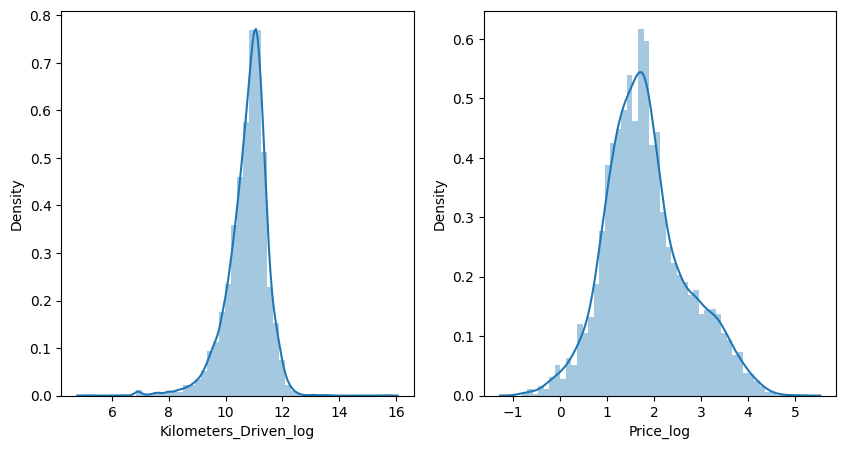

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.distplot(df["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log",ax=axes[0])
sns.distplot(df["Price_log"], axlabel="Price_log",ax=axes[1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage_Value          7251 non-null   float64
 8   Engine_Value           7207 non-null   float64
 9   Power_Value            7078 non-null   float64
 10  Seats                  7200 non-null   float64
 11  New_Price_Value        1006 non-null   float64
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

<Figure size 1300x1700 with 0 Axes>

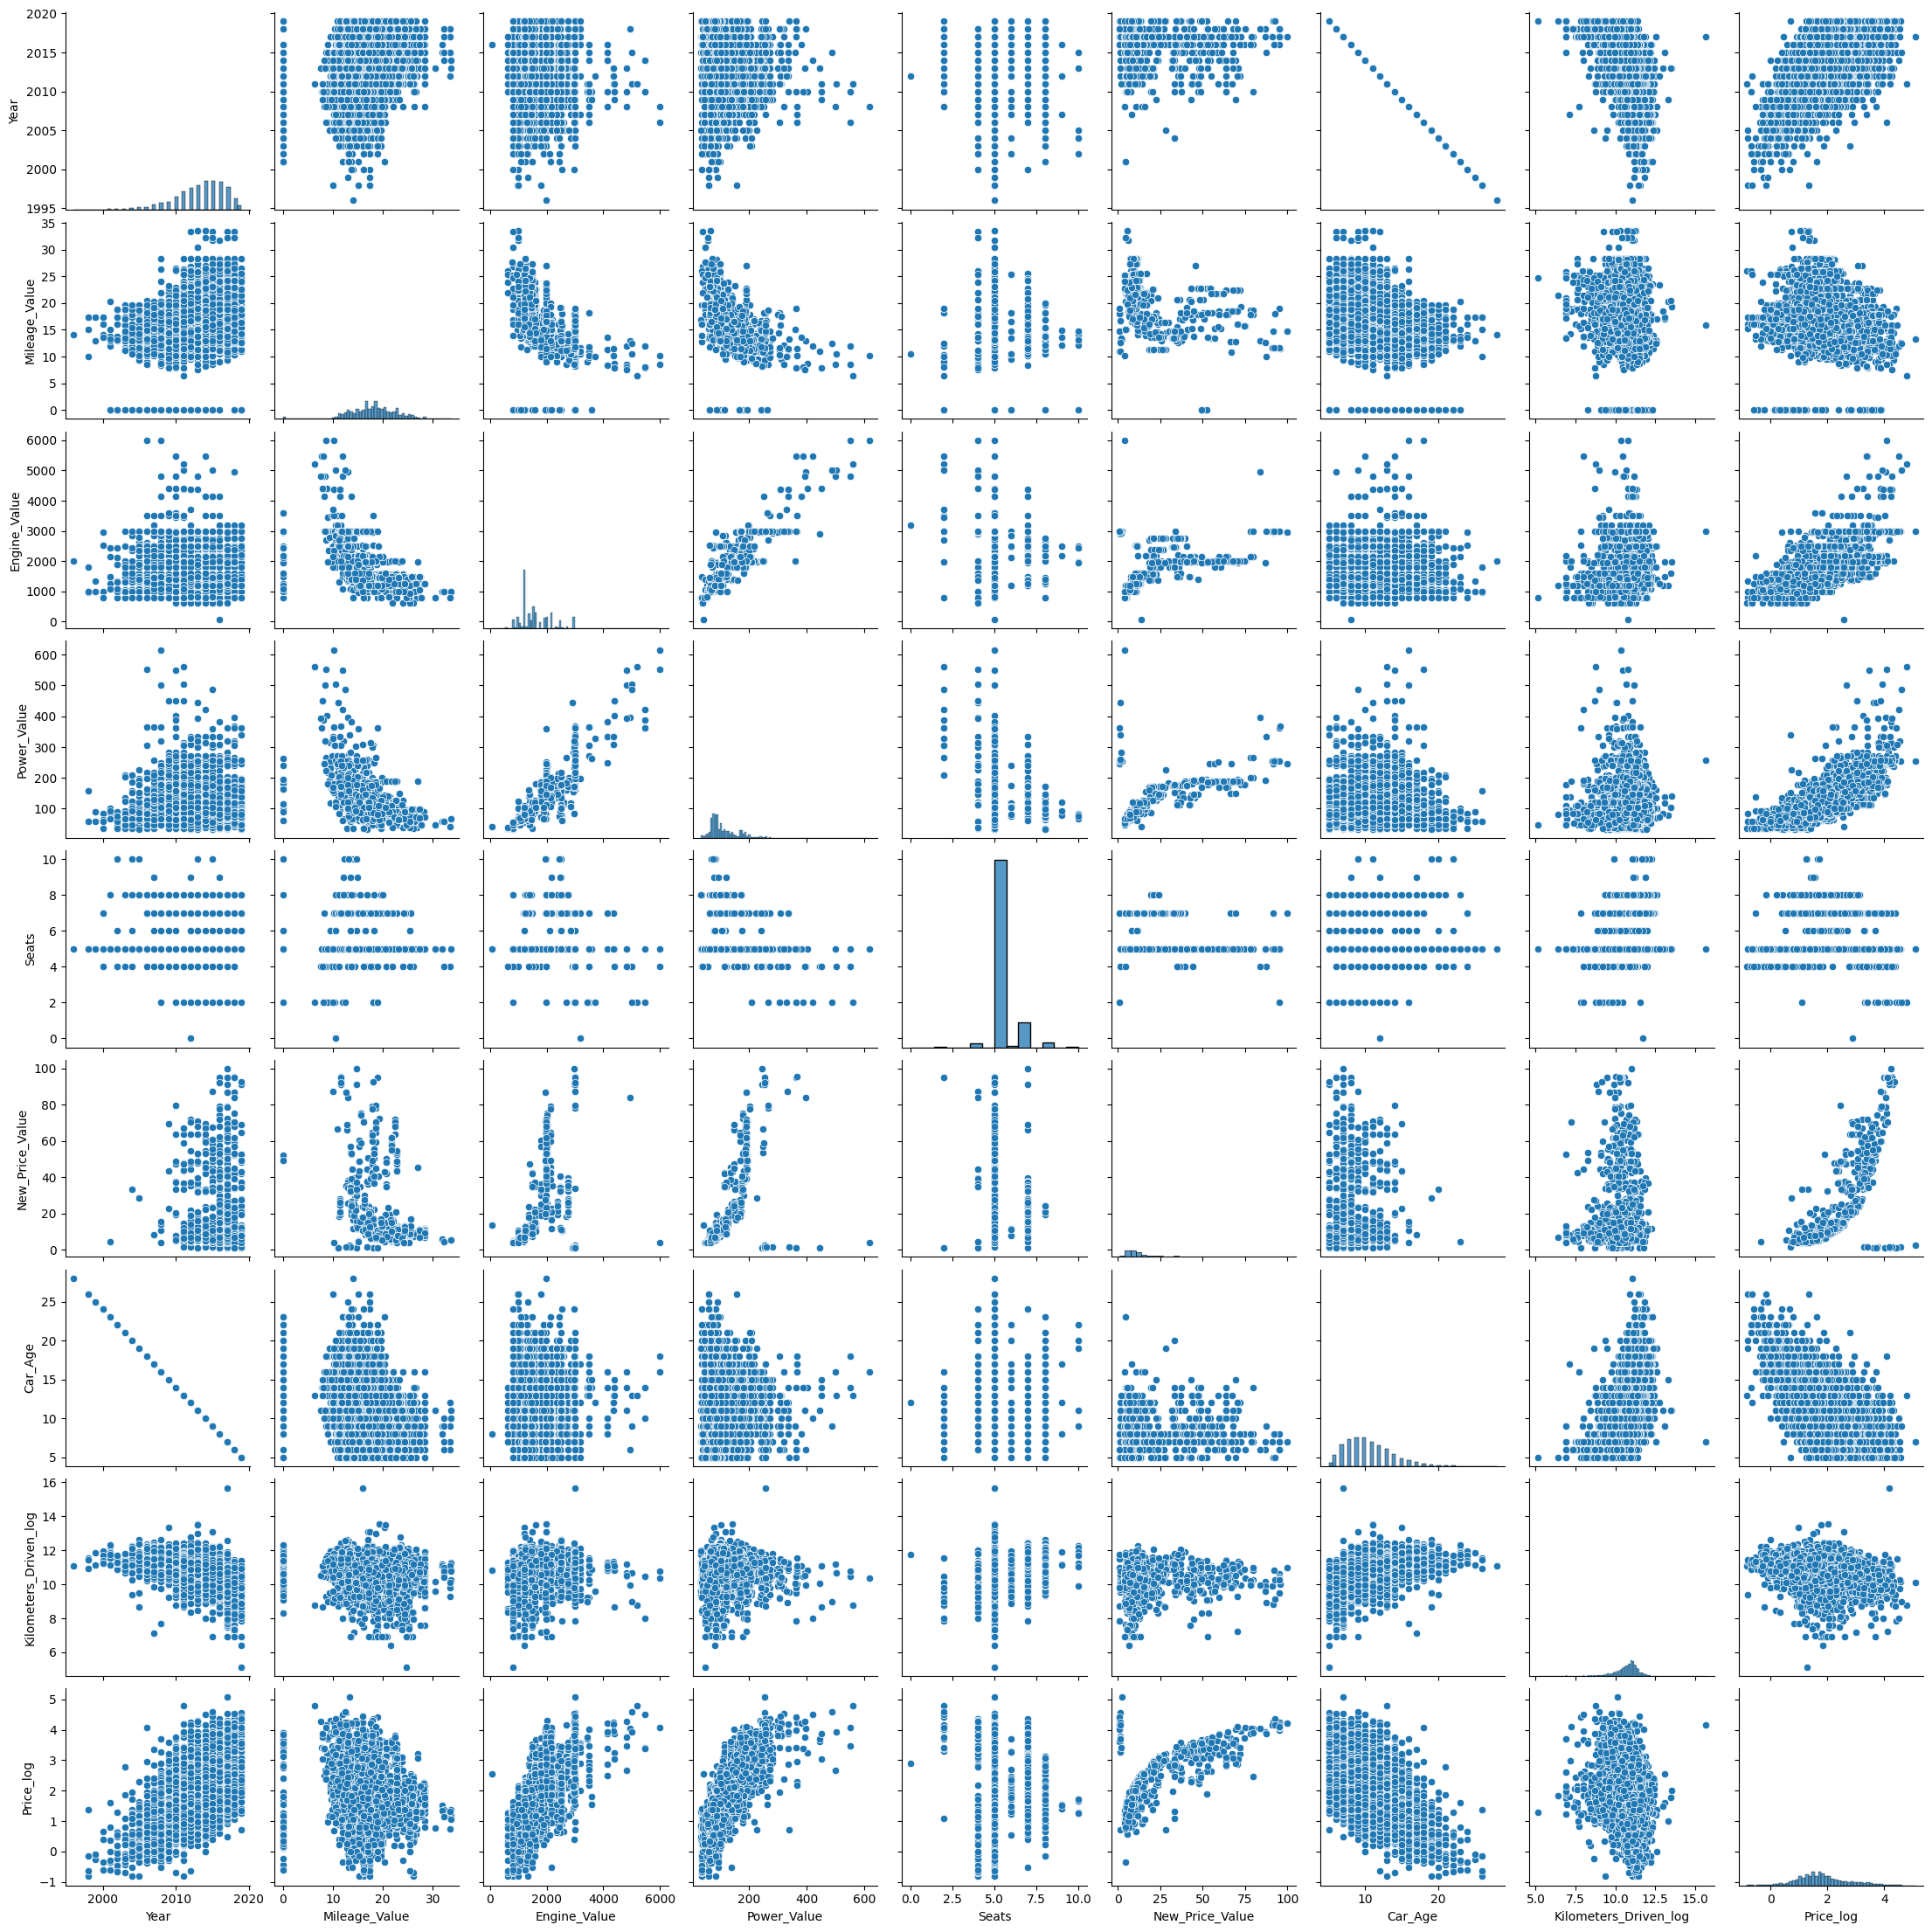

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

**Pair Plot provides below insights:**

*   The variable Year has a positive correlation with price and mileage
*   A year has a Negative correlation with kilometers-Driven
*   Mileage is negatively correlated with Power
*   As power increases, mileage decreases
*   Car with recent make is higher at prices. As the age of the car increases price decreases
*   Engine and Power increase, and the price of the car increases











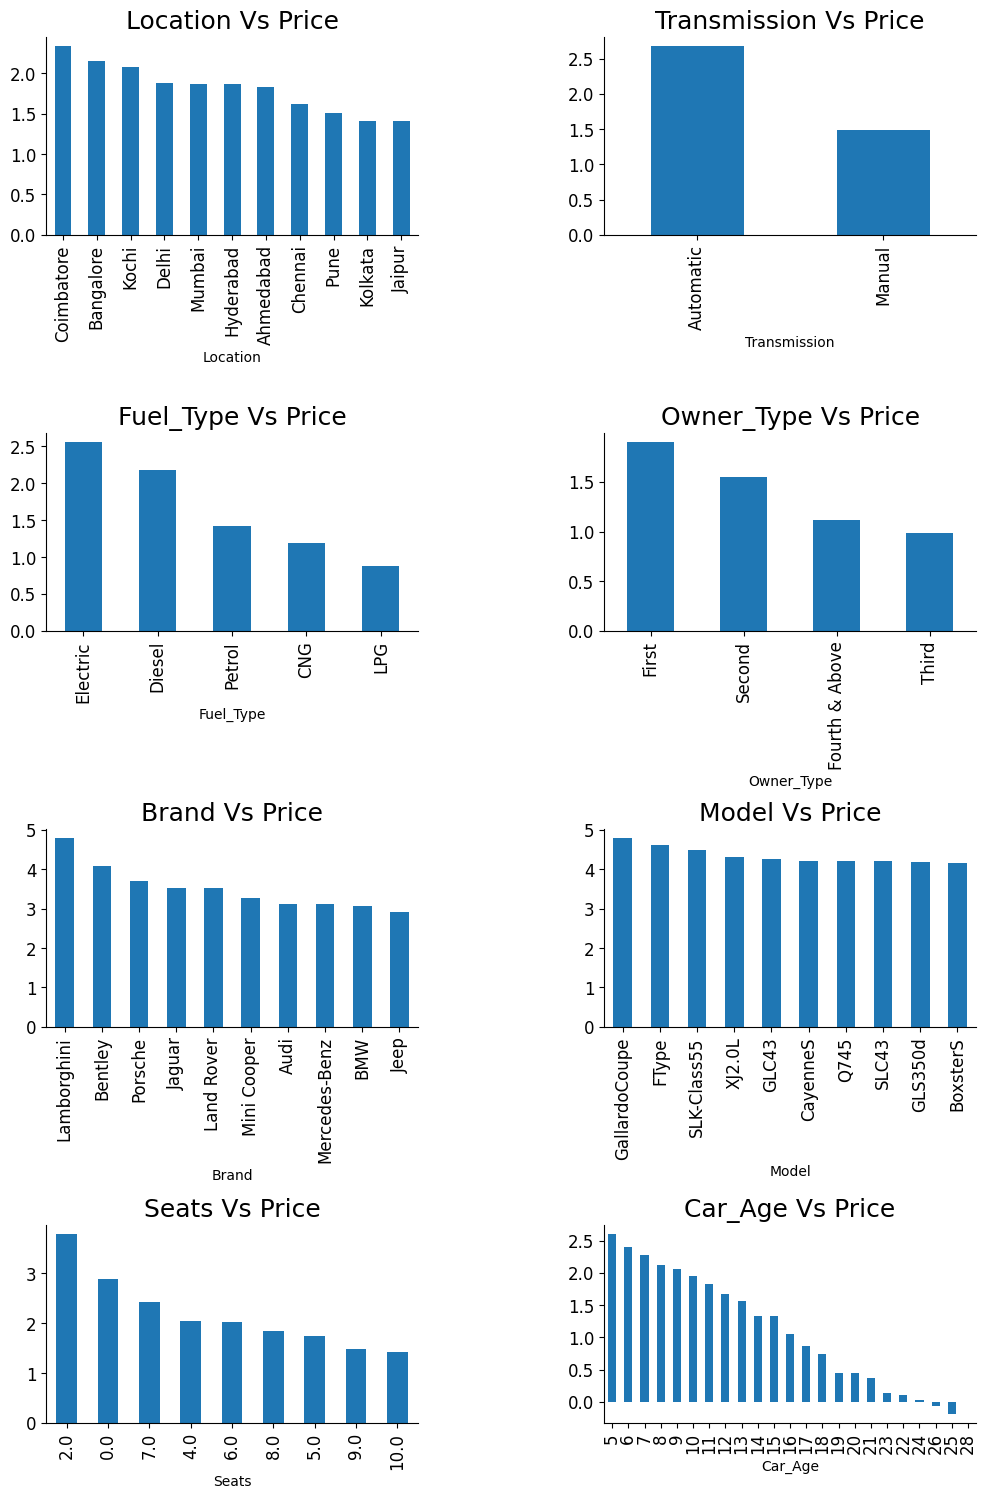

In [ ]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
df.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
df.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
df.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
df.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
df.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
df.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
df.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
df.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

Observations


*   The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
*   Automatic cars have more price than manual cars.
*   Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price
*   First-owner cars are higher in price, followed by a second
The third owner’s price is lesser than the Fourth and above
*   Lamborghini brand is the highest in price
*   Gallardocoupe Model is the highest in price
*   2 Seater has the highest price followed by 7 Seater
*   The latest model cars are high in price











-





### **Multivariate Analysis using HeatMap**

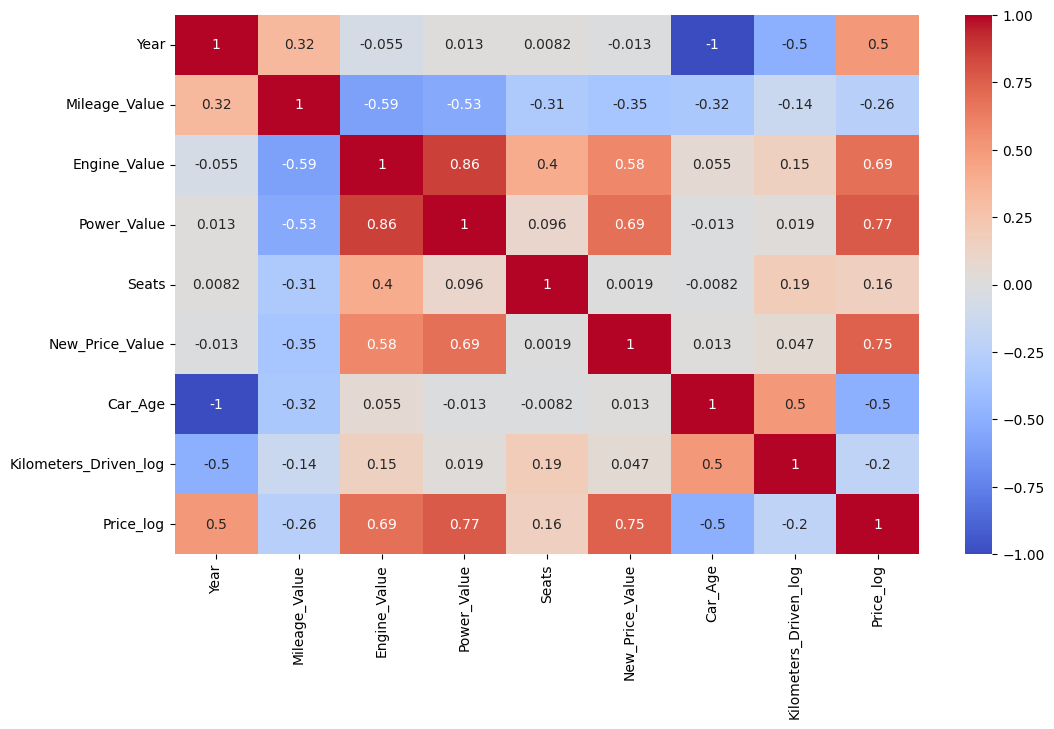

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns and calculate the correlation matrix
numeric_df = df.drop(['Kilometers_Driven', 'Price'], axis=1).select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()


In [ ]:
numeric_df.corr()

,Year,Mileage_Value,Engine_Value,Power_Value,Seats,New_Price_Value,Car_Age,Kilometers_Driven_log,Price_log
Year,1.000000,0.322463,-0.054693,0.013432,0.008216,-0.013467,-1.000000,-0.500028,0.504969
Mileage_Value,0.322463,1.000000,-0.593569,-0.531771,-0.310632,-0.346379,-0.322463,-0.135782,-0.255123
Engine_Value,-0.054693,-0.593569,1.000000,0.859771,0.399262,0.583911,0.054693,0.152933,0.686766
Power_Value,0.013432,-0.531771,0.859771,1.000000,0.095905,0.687479,-0.013432,0.019289,0.768983
Seats,0.008216,-0.310632,0.399262,0.095905,1.000000,0.001917,-0.008216,0.187568,0.163700
New_Price_Value,-0.013467,-0.346379,0.583911,0.687479,0.001917,1.000000,0.013467,0.047265,0.748990
Car_Age,-1.000000,-0.322463,0.054693,-0.013432,-0.008216,0.013467,1.000000,0.500028,-0.504969
Kilometers_Driven_log,-0.500028,-0.135782,0.152933,0.019289,0.187568,0.047265,0.500028,1.000000,-0.204300
Price_log,0.504969,-0.255123,0.686766,0.768983,0.163700,0.748990,-0.504969,-0.204300,1.000000
